In [95]:
import numpy as np
import matplotlib.pyplot as plt
Nx = 240
strain = np.load("strain2_true.npy")
x = np.load("x_true.npy")
strain[:, :Nx, 0, 0].max() / 1e-6

45.18838977674022

In [34]:
np.arange(0, 1, 1/10)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [49]:

s3 = np.load("s1.npy")
s3.max()
# x = np.load("x_true.npy")[0]
# x[:, 1].max()

5605.4907

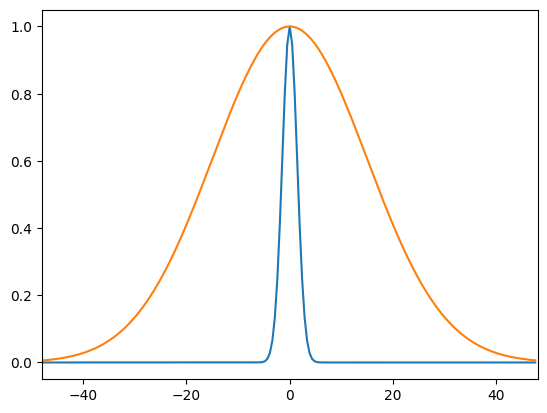

927.6713588434418

In [45]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-0.25, 0.25, 2 * 100, endpoint=False)
_, _, e = signal.gausspulse(t, fc=100, bw = 0.5, bwr=-6, tpr=-60, retquad=True, retenv=True)
t = np.linspace(-48, 48, 2 * 100, endpoint=False)
_, _, e2 = signal.gausspulse(t, fc=0.05, bw = 0.5, bwr=-6, tpr=-10, retquad=True, retenv=True)
plt.plot(t, e, t, e2)
plt.xlim([-4*12, 4*12])
plt.show()
np.sum(np.abs(t) * e2)

In [260]:
x_1_10 = np.load("x_f_1_10.npy")
strain = np.load("strain_f_1_10.npy")
reshaped = einops.rearrange(x_1_10, 't (x y) d -> t x y d', x=12, y=180)
avg = reshaped[:, -1]
disp = avg - avg[0]
max_y_disp = np.max(np.abs(disp[:,:,1]))

strain[:, 90, 0, 0]

array([ 0.0000000e+00,  0.0000000e+00, -9.9439646e-16, ...,
       -2.6354071e-04, -2.6420542e-04, -2.6487108e-04], dtype=float32)

In [316]:
disp_1[:,:,1].shape

(1024, 180)

C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_5053228\55559380.py:39: RuntimeWarning: invalid value encountered in divide
  plt.scatter(avg_1_10[0,:,0],disp_1_10[t,:,1]/max_y_1_10, label='new exp, density=real, force x10')


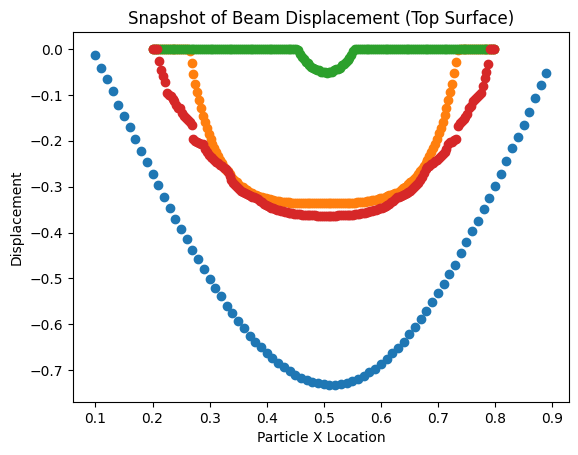

C:\Users\Jeffrey\AppData\Local\Temp\ipykernel_5053228\55559380.py:53: RuntimeWarning: invalid value encountered in divide
  plt.scatter(np.arange(steps), disp_1_10[:1024,90,1]/max_y_1_10, label='new exp, density=real, force x10')


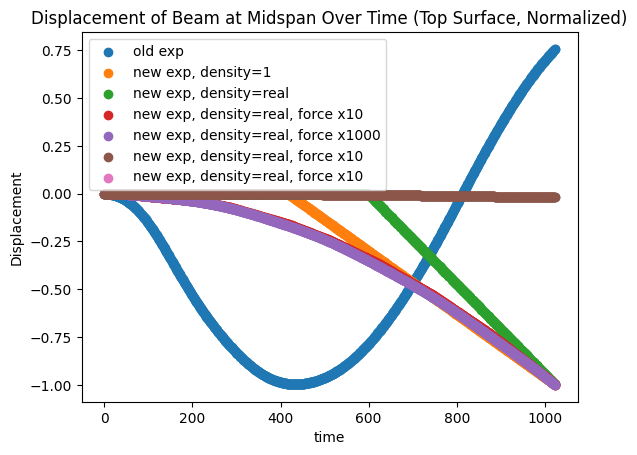

In [312]:
import matplotlib.pyplot as plt
import numpy as np
import einops

steps = 1024

x_old = np.load("x_f_old.npy")
x_1 = np.load("x_f_1.npy")
x_15 = np.load("x_f_15.npy")
x_50 = np.load("x_f_50.npy")
x_5000 = np.load("x_f_5000.npy")
x_10000 = np.load("x_f_10000.npy")
x_1_10 = np.load("x_f_1_10.npy")

def process(x, Nx, Ny):
    reshaped = einops.rearrange(x, 't (x y) d -> t x y d', x=Ny, y=Nx)
    avg = np.mean(reshaped, axis=1)
    avg = np.zeros((steps, Nx, 2))
    # for i in range(steps):
    #     for j in range(Nx):
    #         avg[i, j, 1] = reshaped[i, -1, j, 1] - reshaped[i, 0, j, 1]
    avg = reshaped[:, -1]
    disp = avg - avg[0]
    max_y_disp = np.max(np.abs(disp[:,:,1]))
    return avg, disp, max_y_disp

avg_old, disp_old, max_y_old = process(x_old, 80, 10)
avg_1, disp_1, max_y_1 = process(x_1, 180, 12)
avg_15, disp_15, max_y_15 = process(x_15, 180, 12)
avg_50, disp_50, max_y_50 = process(x_50, 180, 12)
avg_5000, disp_5000, max_y_5000 = process(x_5000, 180, 12)
avg_10000, disp_10000, max_y_10000 = process(x_10000, 180, 12)
avg_1_10, disp_1_10, max_y_1_10 = process(x_1_10, 180, 12)
t = 620
plt.scatter(avg_old[0,:,0],disp_old[t,:,1]/max_y_old, label='old')
plt.scatter(avg_1[0,:,0],disp_1[t,:,1]/max_y_1, label='1')
plt.scatter(avg_15[0,:,0],disp_15[t,:,1]/max_y_15, label='real')
plt.scatter(avg_50[0,:,0],disp_50[t,:,1]/max_y_50, label='new exp, density=real, force x10')
plt.scatter(avg_1_10[0,:,0],disp_1_10[t,:,1]/max_y_1_10, label='new exp, density=real, force x10')

# plt.legend(loc=(0, -0.5))
plt.xlabel('Particle X Location')
plt.ylabel('Displacement')
plt.title('Snapshot of Beam Displacement (Top Surface)')
plt.show()

plt.scatter(np.arange(steps), disp_old[:,40,1]/max_y_old, label='old exp')
plt.scatter(np.arange(steps), disp_1[:,90,1]/max_y_1, label='new exp, density=1')
plt.scatter(np.arange(steps), disp_15[:,90,1]/max_y_15, label='new exp, density=real')
plt.scatter(np.arange(steps), disp_50[:,90,1]/max_y_50, label='new exp, density=real, force x10')
plt.scatter(np.arange(steps), disp_5000[:,90,1]/max_y_5000, label='new exp, density=real, force x1000')
plt.scatter(np.arange(1024), disp_10000[:1024,90,1]/max_y_10000, label='new exp, density=real, force x10')
plt.scatter(np.arange(steps), disp_1_10[:1024,90,1]/max_y_1_10, label='new exp, density=real, force x10')
plt.xlabel('time')
plt.ylabel('Displacement')
plt.title('Displacement of Beam at Midspan Over Time (Top Surface, Normalized)')
plt.legend()
plt.show()

In [267]:
np.sum(e_np[0, :] * 1200/25)

80.26972709784212

49.96501757871307
-50.0


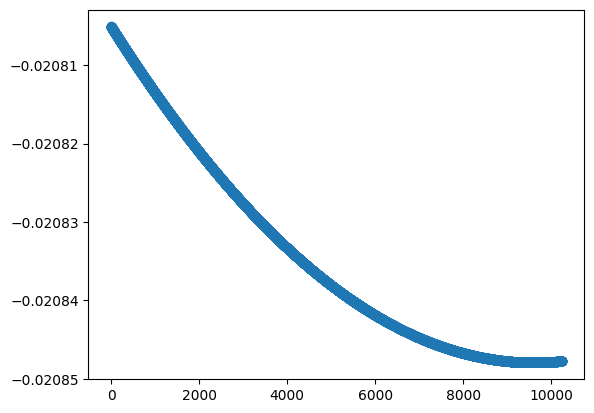

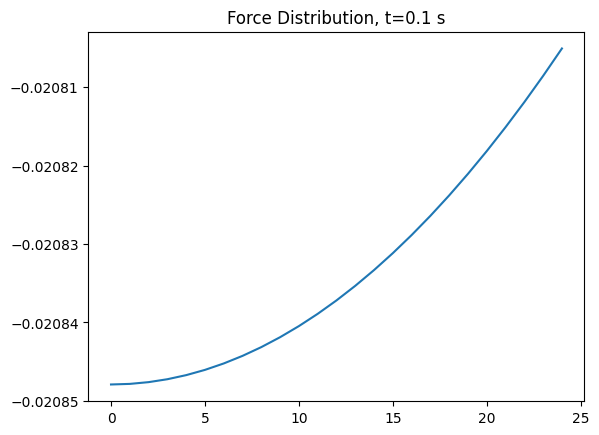

In [5]:
import taichi as ti
import numpy as np
import matplotlib.pyplot as plt
n_grid = 25
max_steps = 10240
size = 1200
dt = 1e-4
f_ext_scale = 1
velocity = 100*12 # 16 / 20 / 0.1
node_x_locs = np.arange(0, 1, 1 / n_grid) * size
time_to_center = node_x_locs / velocity
t_steps = np.arange(max_steps) * dt
t_steps_n = np.array([t_steps - time for time in time_to_center])
t_steps_n = np.stack(t_steps_n, axis=1)

t = np.asarray(t_steps_n)
fc, bw, bwr = 0.05, 0.5, -6
ref = np.power(10.0, bwr / 20.0)
a = -(np.pi * fc * bw) ** 2 / (4.0 * np.log(ref))
e_np = np.exp(-a * t * t)

f_ext = np.zeros((max_steps, n_grid))

for t, node in np.ndindex((max_steps, n_grid)):
            f_ext[t, node] = e_np[t, node]
print(np.sum(f_ext[0, :])*2)
f_ext_scale =  -50/np.sum(f_ext[0, :] * 1200/25*2)
f_ext = f_ext * f_ext_scale
print(np.sum(f_ext[0, :] * 1200/25*2))
plt.scatter(np.arange(max_steps), f_ext[:, 24])
plt.show()

plt.plot(np.arange(n_grid), f_ext[0, :])
plt.title('Force Distribution, t=0.1 s')
plt.show()

In [434]:
s_final = np.load("strain1_final.npy")[:, :, 1, 0]
np.max(np.abs(s_final))

6.667774e-09

[(0.7745002806186676, 0, 0), (0.7658497244119644, 0, 0), (0.7571995109319687, 0, 0), (0.7485484778881073, 0, 0), (0.739898145198822, 0, 0), (0.7312475442886353, 0, 0), (0.621796190738678, 0, 0), (0.605081707239151, 0, 0), (0.5883669555187225, 0, 0), (0.5716525912284851, 0, 0), (0.5549378395080566, 0, 0), (0.5382226705551147, 0, 0), (0.5215080976486206, 0, 0), (0.5047931373119354, 0, 0), (0.488079309463501, 0, 0), (0.47136396169662476, 0, 0), (0.4546496272087097, 0, 0), (0.4379355311393738, 0, 0), (0.5749541223049164, 0, 0), (0.5705382227897644, 0, 0), (0.5661221146583557, 0, 0), (0.5617060661315918, 0, 0), (0.5572899878025055, 0, 0), (0.5528737902641296, 0, 0), (0.548458069562912, 0, 0), (0.5440422594547272, 0, 0), (0.5396267473697662, 0, 0), (0.5352098941802979, 0, 0), (0.5307947099208832, 0, 0), (0.5263783633708954, 0, 0), (0.5696508586406708, 0, 0), (0.5690501630306244, 0, 0), (0.5684490501880646, 0, 0), (0.5678479373455048, 0, 0), (0.5672473311424255, 0, 0), (0.5666462182998657, 0,

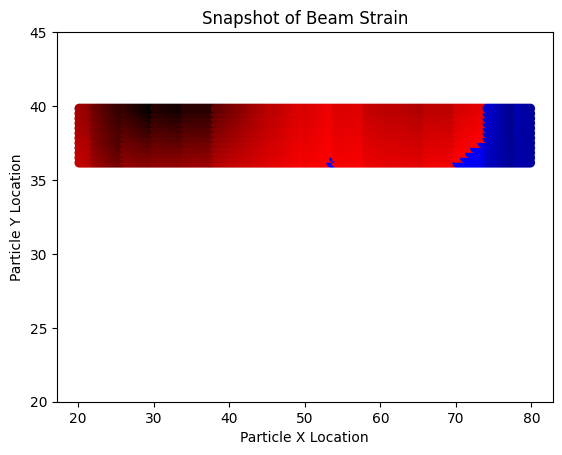

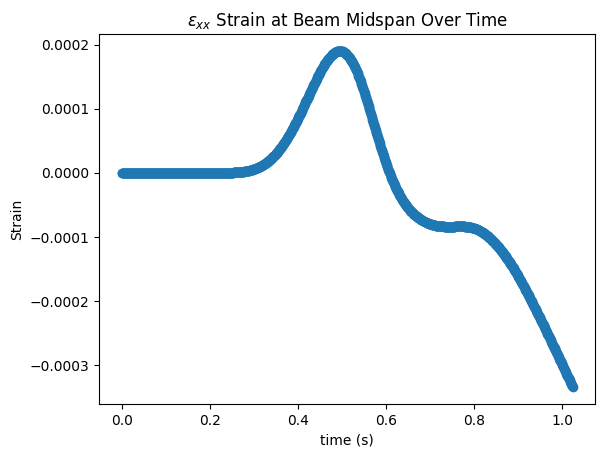

In [560]:
import matplotlib.pyplot as plt
import numpy as np
import einops

steps = 1024
strain_name = "strain2_final.npy"
def gray(levels):
    arr = []
    for level in levels:
        if level < 0:
            arr.append((1+level,0,0))
        elif level > 0:
            arr.append((0,0,1-level))
        else:
            arr.append((0.9,0.9,0.9))
    return arr
strain = np.load(strain_name)[:, :, 0, 0]
strain = strain/np.abs(strain).max()


x_final = np.load("x_final.npy")
s_final = np.load(strain_name)[:, :, 0, 0]
def process(x, Nx, Ny):
    reshaped = einops.rearrange(x, 't (x y) -> t x y', x=Ny, y=Nx)
    # avg = np.mean(reshaped, axis=1)
    # avg = np.zeros((steps, Nx, 2))
    # for i in range(steps):
    #     for j in range(Nx):
    #         avg[i, j, 1] = reshaped[i, -1, j, 1] - reshaped[i, 0, j, 1]
    avg = reshaped[:, -1]
    # disp = avg - avg[0]
    max_y_disp = np.max(np.abs(disp[:,:]))
    return avg, disp, max_y_disp

x_disp = einops.rearrange(x_final, 't (x y) d -> t x y d', x=12, y=180)
x_disp = x_disp - x_disp[0]
s_avg, _ , _ = process(s_final, 180, 12)
t = 900
snapshot = strain[t,:]
colors = gray(snapshot)
print(colors)
plt.scatter(x_final[0,:,0]/12,x_final[0,:,1]/12, color=colors)

# plt.legend(loc=(0, -0.5))
plt.xlabel('Particle X Location')
plt.ylabel('Particle Y Location')
plt.title('Snapshot of Beam Strain')
plt.ylim(20,45)
plt.show()

plt.scatter(np.arange(steps)*1e-3, s_avg[:steps,90])
plt.xlabel('time (s)')
plt.ylabel('Strain')
plt.title('$\epsilon_{xx}$ Strain at Beam Midspan Over Time')
plt.show()

In [323]:
x_final
reshaped = einops.rearrange(x_final, 't (x y) d -> t x y d', x=12, y=180)
avg = np.mean(reshaped, axis=1)
avg = reshaped[:, -1]
disp = avg - avg[0]

disp.max()

0.0

In [644]:
s1 = np.load("s_cs1.npy")
s2 = np.load("s_cs2.npy")

s1.min(), s2.min(), s1.max(), s2.max()

(-0.0029368103, -0.00029495358, 0.0029746294, 0.00027650595)

In [704]:
snapshot_diff = (np.diff(x_disp, axis=2) / (4*12))[t,:, :,0]
snapshot_diff.shape

diff1 = np.diff(x_disp, axis=2) / (8*12)
diff2 = np.diff(einops.rearrange(x_final, 't (x y) d -> t x y d', x=6, y=90), axis=2) / (8*12)

# Get initial x-spacing at time step 0
x = einops.rearrange(x_final, 't (x y) d-> t x y d', x=6, y=90)
x_initial = x[0, :, :, 0]  # shape: (ny, nx)
Lx = x_initial[:, 1:] - x_initial[:, :-1]  # shape: (ny, nx-1)

# Get current x-positions at all time steps
x_current = x[:, :, :, 0]  # shape: (steps, ny, nx)

# Compute current delta x between neighbors
delta_x = x_current[:, :, 1:] - x_current[:, :, :-1]  # shape: (steps, ny, nx-1)

# Compute engineering strain
strain_x = (delta_x - Lx[None, :, :]) / Lx[None, :, :]  # broadcast to (steps, ny, nx-1)
strain_x.shape

(50000, 6, 89)

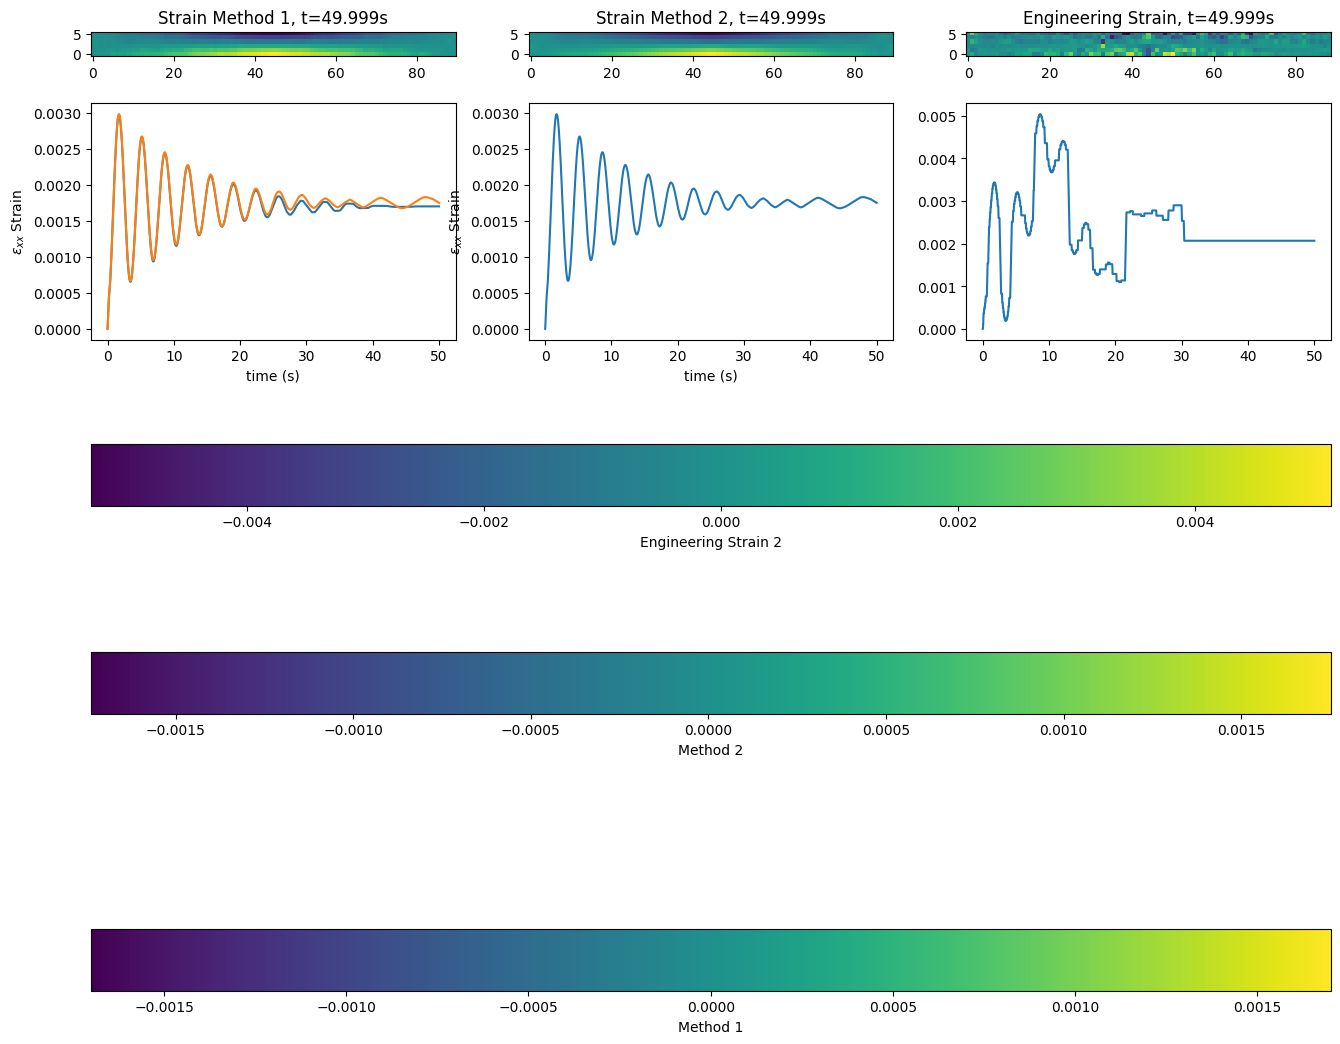

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import einops
from matplotlib import colors

steps = 50000
strain_name = "s_cs1.npy"
strain2_name = "s_cs.npy"


x_final = np.load("x_cs.npy")
s_final = np.load(strain_name)[:, :, 0, 0]
s2_final = np.load(strain2_name)[:, :, 0, 0]
def process(x, Nx, Ny):
    reshaped = einops.rearrange(x, 't (x y) -> t x y', x=Ny, y=Nx)
    # avg = np.mean(reshaped, axis=1)
    # avg = np.zeros((steps, Nx, 2))
    # for i in range(steps):
    #     for j in range(Nx):
    #         avg[i, j, 1] = reshaped[i, -1, j, 1] - reshaped[i, 0, j, 1]
    avg = reshaped[:, 0]
    # disp = avg - avg[0]
    max_y_disp = np.max(np.abs(disp[:,:]))
    return avg, disp, max_y_disp, reshaped

x_disp = einops.rearrange(x_final, 't (x y) d -> t x y d', x=6, y=90)
x_disp = x_disp - x_disp[0]
s_avg, _ , _, s_reshaped= process(s_final, 90, 6)
s2_avg, _ , _, s2_reshaped= process(s2_final, 90, 6)
diff1 = np.diff(x_disp, axis=2)
diff2 = np.diff(einops.rearrange(x_final, 't (x y) d -> t x y d', x=6, y=90), axis=2) / 8
t = 49999
snapshot = s_reshaped[t,:]
snapshot2 = s2_reshaped[t,:]
# snapshot_diff = diff1[t,:, :,0]
snapshot_diff = strain_x[t]

datasets = [
    snapshot,
    snapshot2,
    # snapshot_diff
]
fig, axs = plt.subplots(2, 3, figsize=(16,16))

norm = colors.Normalize(vmin=np.min(datasets), vmax=np.max(datasets))

images = []

images.append(axs[0,0].imshow(datasets[0]))
images.append(axs[0,1].imshow(datasets[1]))
images.append(axs[0,2].imshow(snapshot_diff))

fig.colorbar(images[0], ax=axs, orientation='horizontal', fraction=.1, label='Method 1')
fig.colorbar(images[1], ax=axs, orientation='horizontal', fraction=.1, label='Method 2')
fig.colorbar(images[2], ax=axs, orientation='horizontal', fraction=.1, label='Engineering Strain 2')

axs[0, 0].set_title(f"Strain Method 1, t={t*1e-3}s")
axs[0, 1].set_title(f"Strain Method 2, t={t*1e-3}s")
axs[0, 2].set_title(f"Engineering Strain, t={t*1e-3}s")

axs[1,0].plot(np.arange(steps)*1e-3, s_avg[:steps,45])
axs[1,0].plot(np.arange(steps)*1e-3, s2_avg[:steps,45])
axs[1,0].set_xlabel('time (s)')
axs[1,0].set_ylabel('$\epsilon_{xx}$ Strain')

axs[1,1].plot(np.arange(steps)*1e-3, s2_avg[:steps,45])#/48)
axs[1,1].set_xlabel('time (s)')
axs[1,1].set_ylabel('$\epsilon_{xx}$ Strain')
# axs[1,0].set_title('Strain at Beam Bottom Midspan Over Time')

axs[1,2].plot(np.arange(steps)*1e-3, strain_x[:steps,0,45])

for i in range(3):
    axs[0, i].invert_yaxis()
plt.show()

In [677]:
np.diff(x_disp, axis=2).shape

(50000, 6, 89, 2)

In [ ]:
s_final = np.load("strain1_final.npy")[:, :, 1, 0]
np.max(np.abs(s_final))

6.667774e-09

In [614]:
snapshot.shape

(2160,)